In [1]:
import pandas as pd
import numpy as np

from sklearn.multiclass import OneVsRestClassifier
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, classification_report, confusion_matrix, matthews_corrcoef, roc_curve, auc, roc_auc_score
from sklearn import preprocessing

from sklearn.svm import SVC
from sklearn.svm import LinearSVC
from sklearn.model_selection import learning_curve

import matplotlib.pyplot as plt

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
# read pre-processed data
data = pd.read_csv('/content/drive/MyDrive/ColabData/twitter_2016/preprocessed_twitter_2016.csv')

In [4]:
print(data)

       Unnamed: 0                                              tweet  \
0               0    rt _hockey: it’s gold gbr rio2016 hockey @_gbh…   
1               1  amazing! congratulations winning modernpentath...   
2               2  wait. ashton eaton won decathlon gold again? yas!   
3               3  got shivers watching end chloe esposito's race...   
4               4     celebrating gold! effort! congratulations! 👍💪🏅   
...           ...                                                ...   
82731       82731  closed buy xauusd 1351.54 -653.0 pips, total t...   
82732       82732  closed buy 67.0 lots xauusd 1351.54 -653.0 pip...   
82733       82733  closed buy xauusd 1351.54 -653.0 pips, total t...   
82734       82734  august 2016 far 45.97% robot ea realaccount ✔ ...   
82735       82735  xauusd uluslararası piyasa raporu yayınlanmışt...   

       Subjectivity  Polarity  Analysis  
0             0.000     0.000   Neutral  
1             0.825     0.625  Positive  
2        

In [5]:
# getting labels from pre-processed dataset
label = data.iloc[:, -1:].values
print(label)

[['Neutral']
 ['Positive']
 ['Neutral']
 ...
 ['Negative']
 ['Positive']
 ['Neutral']]


In [6]:
# data.iloc[:,:-1] get all the columns except label column - for the X_train
X_train, X_test, y_train, y_test = train_test_split (data['tweet'], label, test_size=0.2, random_state=0)

In [7]:
# label encoder
Encoder = LabelEncoder()
print(y_train[:10])

y_train = Encoder.fit_transform(y_train)
print(y_train[:10])

y_test = Encoder.fit_transform(y_test)

[['Neutral']
 ['Negative']
 ['Neutral']
 ['Positive']
 ['Positive']
 ['Negative']
 ['Neutral']
 ['Negative']
 ['Positive']
 ['Neutral']]
[1 0 1 2 2 0 1 0 2 1]


/usr/local/lib/python3.8/dist-packages/sklearn/preprocessing/_label.py:115: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [8]:
# TFIDF vectorizer
vectorizer = TfidfVectorizer(analyzer='word', lowercase=True)

X_train_tfidf = vectorizer.fit_transform(X_train.values.astype(str))
X_test_tfidf = vectorizer.transform(X_test.values.astype(str))
print(X_train_tfidf.toarray())

[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


In [9]:
# For large datasets consider using LinearSVC or SGDClassifier instead, possibly after a Nystroem transformer.
# more info: https://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html
svc = LinearSVC()

# train
svc.fit(X_train_tfidf, y_train)

LinearSVC()

In [10]:
# predict the labels on validation dataset
predictions_SVM = svc.predict(X_test_tfidf)

In [11]:
accuracy = accuracy_score(y_test, predictions_SVM)
print(accuracy)

0.9960116026105874


### 2. Learning Curve

In [12]:
train_sizes, train_scores, test_scores = learning_curve(LinearSVC(), X_train_tfidf, y_train, cv=10, scoring='accuracy', n_jobs=-1, train_sizes=np.linspace(0.01,1,50), verbose=1)

[learning_curve] Training set sizes: [  595  1799  3002  4206  5409  6613  7816  9020 10223 11427 12631 13834
 15038 16241 17445 18648 19852 21055 22259 23462 24666 25869 27073 28277
 29480 30684 31887 33091 34294 35498 36701 37905 39108 40312 41515 42719
 43923 45126 46330 47533 48737 49940 51144 52347 53551 54754 55958 57161
 58365 59569]


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done 500 out of 500 | elapsed:  2.4min finished


In [13]:
# getting mean values of training score
train_mean = np.mean(train_scores, axis=1)
train_mean

array([1.        , 1.        , 0.9997002 , 0.99952449, 0.99963025,
       0.99984878, 0.99987206, 0.99988914, 0.99990218, 0.99988623,
       0.99983374, 0.99984097, 0.9998537 , 0.99986454, 0.99985669,
       0.99981767, 0.99979347, 0.99983377, 0.9998158 , 0.99985082,
       0.99981351, 0.99984151, 0.99986703, 0.99986915, 0.99987449,
       0.99989245, 0.99995923, 0.99996071, 0.99996209, 0.99996338,
       0.99995368, 0.99993932, 0.99993607, 0.99993054, 0.99992292,
       0.99992275, 0.99992487, 0.99991136, 0.99990287, 0.99990743,
       0.99990562, 0.99990589, 0.99990028, 0.99991404, 0.99991597,
       0.99991781, 0.99991958, 0.99992302, 0.99992461, 0.99992446])

In [14]:
train_std = np.std(train_scores, axis=1)

In [15]:
test_mean = np.mean(test_scores, axis=1)

In [16]:
#standard dev.
test_std = np.std(test_scores, axis=1)

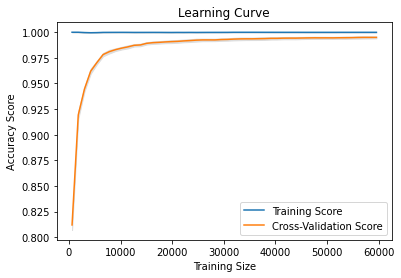

In [17]:
plt.plot(train_sizes, train_mean, label='Training Score')
plt.plot(train_sizes, test_mean, label='Cross-Validation Score')

plt.fill_between(train_sizes, train_mean-train_std, train_mean+train_std, color='#DDDDDD')
plt.fill_between(train_sizes, test_mean-test_std, test_mean+test_std, color='#DDDDDD')

plt.title('Learning Curve')
plt.xlabel('Training Size')
plt.ylabel('Accuracy Score')
plt.legend(loc = 'best')

### 2. Model Evaluation
>**TN / True Negative:** the case was negative and predicted negative<br>
**TP / True Positive:** the case was positive and predicted positive<br>
**FN / False Negative:** the case was positive but predicted negative<br>
**FP / False Positive:** the case was negative but predicted positive<br>

#### 2.1. Accuracy

In [18]:
accuracy = accuracy_score(y_test, predictions_SVM)
print(accuracy)

0.9960116026105874


#### 2.2. F-Measure
>**What percent of positive predictions were correct?**<br>
F1 Score = 2*(Recall * Precision) / (Recall + Precision)

In [19]:
print(f1_score(y_test, predictions_SVM, average="macro"))

0.9950255999402096


#### 2.3. Precision
>**Accuracy of positive predictions.**<br>
Precision = TP/(TP + FP)

In [20]:
print(precision_score(y_test, predictions_SVM, average="macro"))

0.9961282276160569


#### 2.4. Recall
>**What percent of the positive cases did you catch?**<br>
Recall = TP/(TP+FN)



In [21]:
print(recall_score(y_test, predictions_SVM, average="macro")) 

0.9939328330162471


#### 2.5. AUC (Area Under Curve)
>*AUC–ROC curve is the model selection metric for bi–multi class classification problem. ROC is a probability curve for different classes. ROC tells us how good the model is for distinguishing the given classes, in terms of the predicted probability.<br>
A typical ROC curve has False Positive Rate (FPR) on the X-axis and True Positive Rate (TPR) on the Y-axis.*

>We have three classes in the dataset. Therefore, we will calculate ROC value for all classes.<br>
**Labels are expressed in binary format with one-hot encoding.**<br>
***ROC Curve is obtained as much as the number of classes.***

/usr/local/lib/python3.8/dist-packages/sklearn/preprocessing/_label.py:115: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


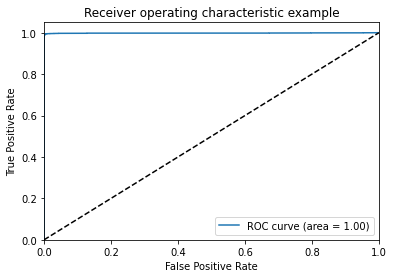

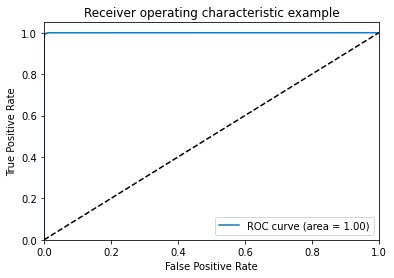

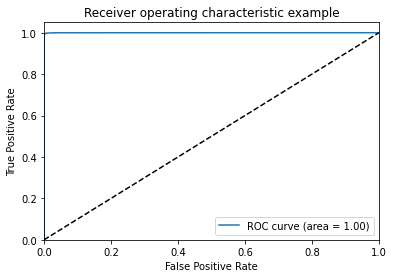

In [22]:
X, y = data['tweet'], label

y = Encoder.fit_transform(y)

y = preprocessing.label_binarize(y, classes=[0,1,2])
n_classes = 3

# shuffle and split training and test sets
X_train, X_test, y_train, y_test =\
    train_test_split(X, y, test_size=0.33, random_state=0)

# TFIDF vectorizer
vectorizer = TfidfVectorizer(analyzer='word', lowercase=True)
X_train_tfidf = vectorizer.fit_transform(X_train.values.astype(str))
X_test_tfidf = vectorizer.transform(X_test.values.astype(str))

# classifier
clf = OneVsRestClassifier(LinearSVC())

# train
y_score = clf.fit(X_train_tfidf, y_train).decision_function(X_test_tfidf)

# predict the labels on validation dataset
#predictions_SVM = clf.predict(X_test_tfidf)

# Compute ROC curve and ROC area for each class
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test[:, i], y_score[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Plot of a ROC curve for a specific class
for i in range(n_classes):
    plt.figure()
    plt.plot(fpr[i], tpr[i], label='ROC curve (area = %0.2f)' % roc_auc[i])
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()